# Sanity Check

In [2]:
import MDAnalysis as mda
atomistic_system = mda.Universe
from modules.dssp import dssp
from modules.plot import edr_plot , box_plot
import matplotlib.pyplot as plt
import input
%reload_ext autoreload
%autoreload 2

In [12]:
atomistic_system, reference_structure, energy_like_terms, is_aligned = input.read_files()

Aligned file found, reading this instead


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


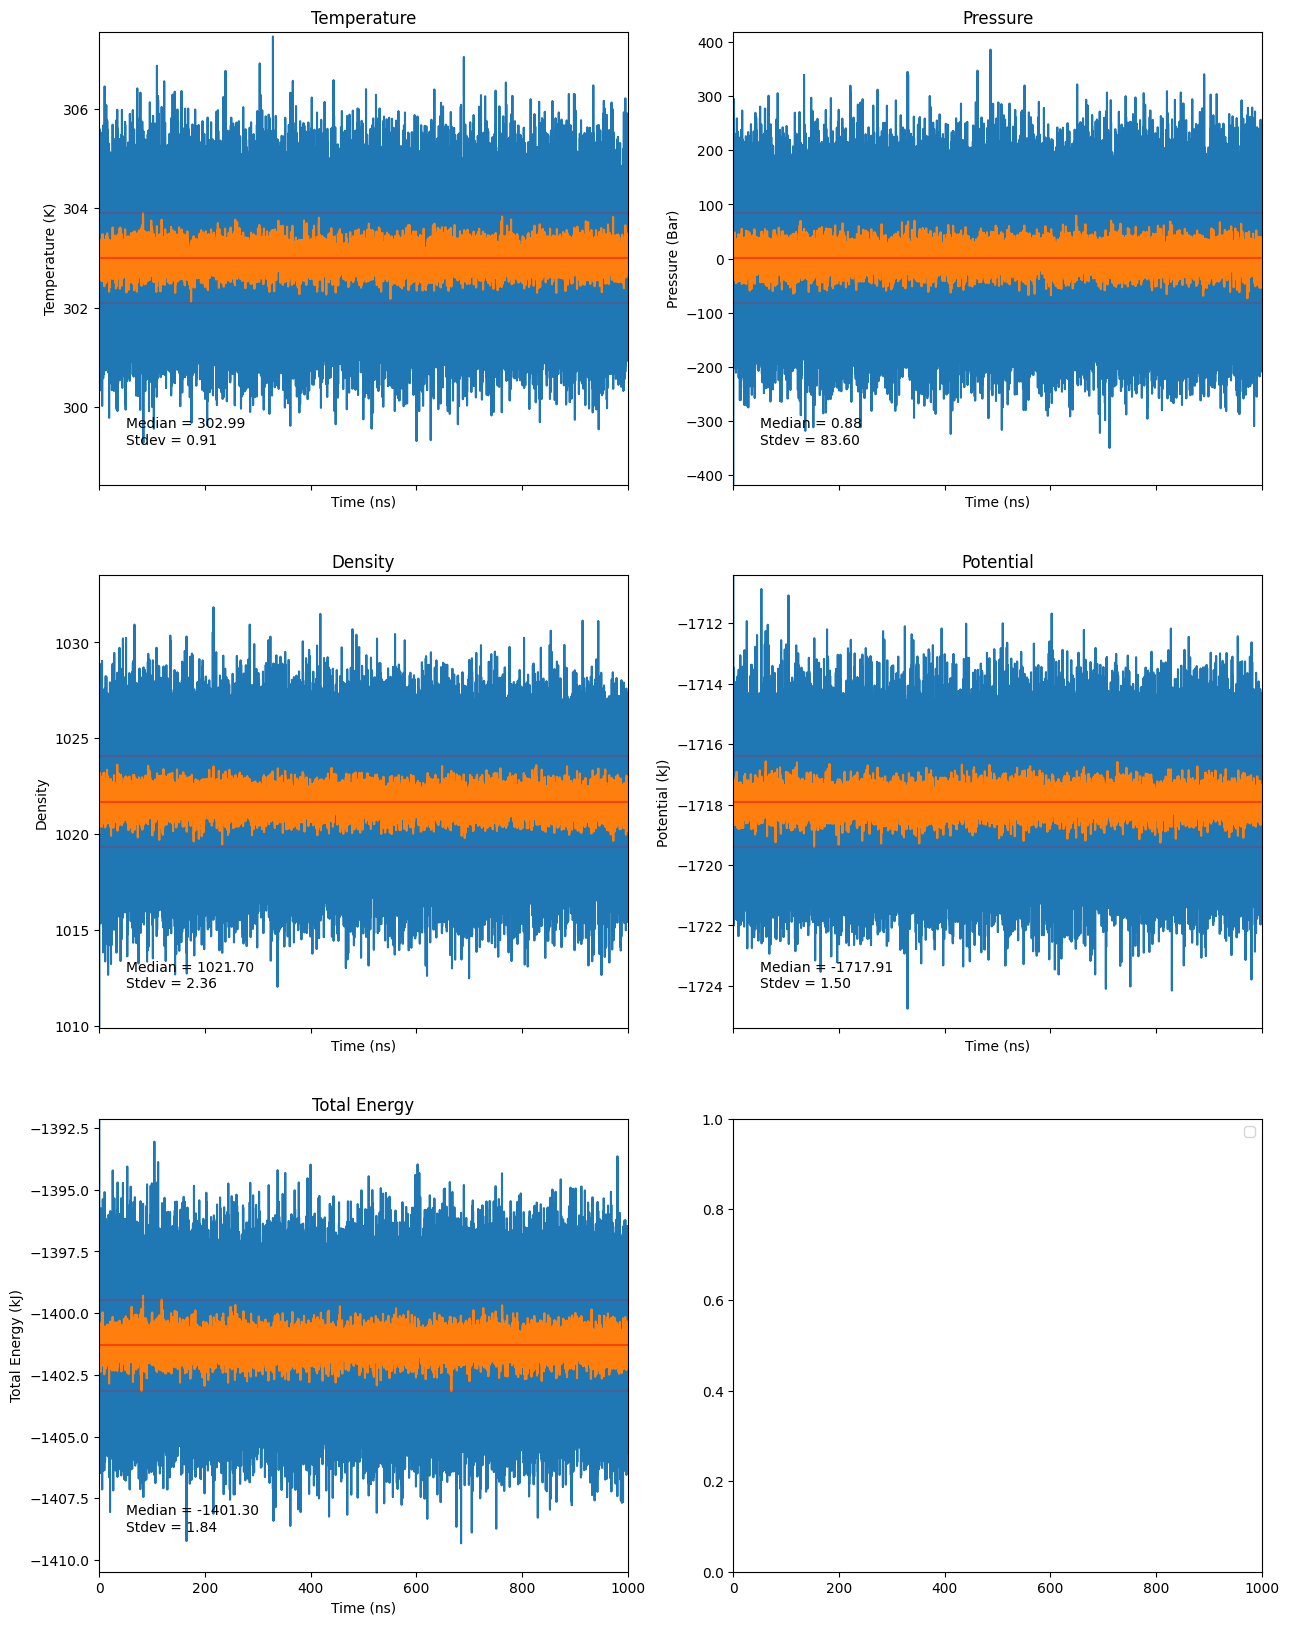

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=3, sharex=True)
fig.set(figheight=20, figwidth=15)
edr_plot(energy_like_terms, axs[0,0],'Temperature', "K")
edr_plot(energy_like_terms, axs[0,1],'Pressure', "Bar")
edr_plot(energy_like_terms, axs[1,0],'Density')
edr_plot(energy_like_terms, axs[1,1],'Potential', "kJ", divide = 1000)
edr_plot(energy_like_terms, axs[2,0],'Total Energy', "kJ", divide = 1000)
plt.legend()

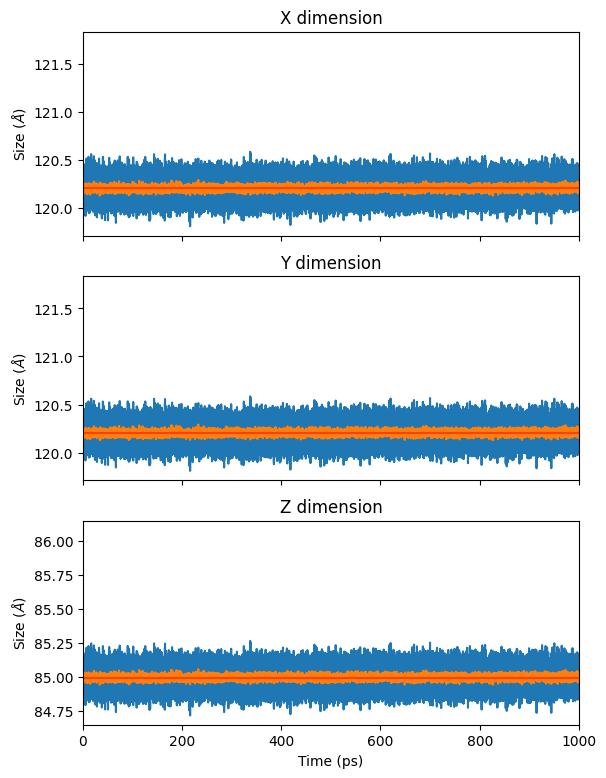

In [5]:
#Get and plot Density data
box_plot(energy_like_terms)

In [16]:
import numpy as np

# Create Universe object


# Select atoms you are interested in, for example, all atoms
atoms = atomistic_system.atoms

# Loop over trajectory frames
min_distance = float('inf')  # Initialize with positive infinity
for ts in atomistic_system.trajectory:
    # Get coordinates of all atoms
    coordinates = atoms.positions
    atomistic_system.dimensions.wrap(coordinates)

    distances = np.linalg.norm(coordinates[:, np.newaxis] - coordinates, axis=-1)


    # Exclude self-distances
    np.fill_diagonal(distances, np.inf)

    # Find minimum distance
    min_distance_frame = np.min(distances)

    # Update overall minimum distance
    min_distance = min(min_distance, min_distance_frame)

print("Minimum distance between periodic images:", min_distance)

AttributeError: 'numpy.ndarray' object has no attribute 'wrap'